In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("svg")

In [3]:
kernel_size = 3
stride = 3

p2 = nn.MaxPool2d(kernel_size, stride)
p3 = nn.MaxPool3d(kernel_size, stride)

print(f"{p2=}")
print(f"{p3=}")

p2=MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
p3=MaxPool3d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)


In [5]:
img2 = torch.rand((1, 1, 30, 30))
img3 = torch.rand((1, 3, 30, 30))

img2_p2 = p2(img2)
#img2_p3 = p3(img2)
img3_p2 = p2(img3)
img3_p3 = p3(img3)

print(f"{img2_p2.shape=} -- {img3_p2.shape=} -- {img3_p3.shape=}")

img2_p2.shape=torch.Size([1, 1, 10, 10]) -- img3_p2.shape=torch.Size([1, 3, 10, 10]) -- img3_p3.shape=torch.Size([1, 1, 10, 10])


In [7]:
little_net = nn.Sequential(
    # CNN Block
    nn.Conv2d(3, 10, 5, 3, 2),
    nn.ReLU(),
    nn.AvgPool3d(3, 3),

    # FFN part
    nn.Flatten(),
    nn.Linear(588, 1),
    nn.Sigmoid()
)

In [8]:
img = torch.rand((1, 3, 128, 128))
little_net(img)

tensor([[0.4857]], grad_fn=<SigmoidBackward0>)

## Image Transformations cifar10 dataset

In [29]:
from torchvision.datasets import CIFAR10
import torchvision.transforms as T
import numpy as np


In [11]:
cdata = CIFAR10("../data", download=True)
print(cdata)

100.0%


Extracting ../data/cifar-10-python.tar.gz to ../data
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data
    Split: Train


In [19]:
cdata.data.shape

(50000, 32, 32, 3)

In [21]:
cdata.classes, cdata.targets

(['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,

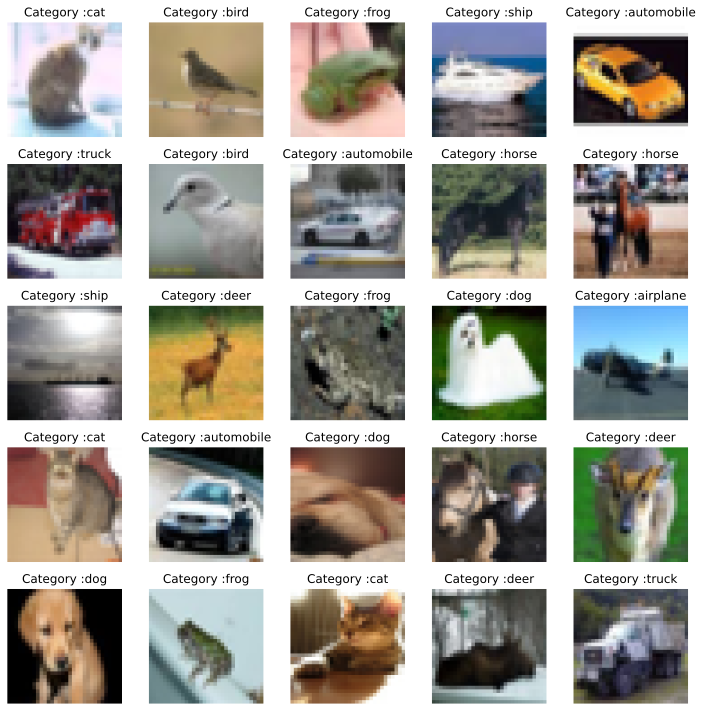

In [27]:
# Inspect a few images

fig, axs = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    rand_idx = np.random.choice(len(cdata.targets))
    ax.imshow(cdata[rand_idx][0])
    ax.set_title(f"Category :{cdata.classes[cdata[rand_idx][1]]}")
    ax.axis("off")
plt.tight_layout()
plt.show()

In [31]:
Ts = T.Compose([
    T.ToTensor(),
    T.Resize(32*4),
    T.Grayscale(num_output_channels=1)
])
# include the transforms with the dataset
cdata.transform = Ts

# Adding transforms doesnt change data
# cdata.data is unchanged
cdata.data[123, :, :, :].shape

(32, 32, 3)

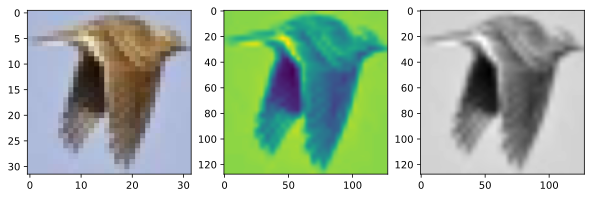

In [34]:
# Apply the transformation
# option 1
img1 = Ts(cdata.data[123, :, :, :])

# option 2
img2 = cdata.transform(cdata.data[123, :, :, :])

# Let's see what we have done
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(cdata.data[123, :, :, :])
ax[1].imshow(torch.squeeze(img1))
ax[2].imshow(torch.squeeze(img2), cmap="gray")

plt.show()